In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Baseline model
def build_baseline_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

baseline_model = build_baseline_model()
history_baseline = baseline_model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=2)

C:\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.

Epoch 1/50
1250/1250 - 27s - 21ms/step - accuracy: 0.3152 - loss: 1.8913 - val_accuracy: 0.3862 - val_loss: 1.7171
Epoch 2/50
1250/1250 - 33s - 26ms/step - accuracy: 0.3934 - loss: 1.6853 - val_accuracy: 0.4218 - val_loss: 1.6391
Epoch 3/50
1250/1250 - 34s - 28ms/step - accuracy: 0.4252 - loss: 1.6093 - val_accuracy: 0.4231 - val_loss: 1.6345
Epoch 4/50
1250/1250 - 39s - 31ms/step - accuracy: 0.4473 - loss: 1.5466 - val_accuracy: 0.4468 - val_loss: 1.5774
Epoch 5/50
1250/1250 - 35s - 28ms/step - accuracy: 0.4594 - loss: 1.5084 - val_accuracy: 0.4543 - val_loss: 1.5463
Epoch 6/50
1250/1250 - 32s - 26ms/step - accuracy: 0.4687 - loss: 1.4805 - val_accuracy: 0.4536 - val_loss: 1.5325
Epoch 7/50
1250/1250 - 36s - 29ms/step - accuracy: 0.4802 - loss: 1.4525 - val_accuracy: 0.4628 - val_loss: 1.5291
Epoch 8/50
1250/1250 - 43s - 34ms/step - accuracy: 0.4852 - loss: 1.4261 - val_accuracy: 0.4754 - val_loss: 1.4937
Epoch 9/50
1250/1250 - 41s - 33ms/step - accuracy: 0.4951 - loss: 1.4045 - val_a

In [2]:
def build_dropout_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

dropout_model = build_dropout_model()
history_dropout = dropout_model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=2)

Epoch 1/50
1250/1250 - 43s - 35ms/step - accuracy: 0.1536 - loss: 2.2103 - val_accuracy: 0.2115 - val_loss: 2.0980
Epoch 2/50
1250/1250 - 40s - 32ms/step - accuracy: 0.1839 - loss: 2.1222 - val_accuracy: 0.2414 - val_loss: 2.0332
Epoch 3/50
1250/1250 - 39s - 31ms/step - accuracy: 0.1929 - loss: 2.0972 - val_accuracy: 0.2556 - val_loss: 2.0612
Epoch 4/50
1250/1250 - 41s - 33ms/step - accuracy: 0.1940 - loss: 2.0899 - val_accuracy: 0.2423 - val_loss: 2.0774
Epoch 5/50
1250/1250 - 38s - 31ms/step - accuracy: 0.1960 - loss: 2.0851 - val_accuracy: 0.2693 - val_loss: 2.0374
Epoch 6/50
1250/1250 - 41s - 33ms/step - accuracy: 0.2043 - loss: 2.0790 - val_accuracy: 0.2319 - val_loss: 2.0601
Epoch 7/50
1250/1250 - 38s - 31ms/step - accuracy: 0.2024 - loss: 2.0711 - val_accuracy: 0.2195 - val_loss: 2.0662
Epoch 8/50
1250/1250 - 39s - 31ms/step - accuracy: 0.2007 - loss: 2.0747 - val_accuracy: 0.2433 - val_loss: 2.0105
Epoch 9/50
1250/1250 - 38s - 31ms/step - accuracy: 0.2024 - loss: 2.0684 - val_a

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

early_model = build_baseline_model()
history_early = early_model.fit(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stop], verbose=2)

Epoch 1/50
1250/1250 - 40s - 32ms/step - accuracy: 0.3222 - loss: 1.8784 - val_accuracy: 0.3703 - val_loss: 1.7703
Epoch 2/50
1250/1250 - 38s - 31ms/step - accuracy: 0.3940 - loss: 1.6931 - val_accuracy: 0.4051 - val_loss: 1.6623
Epoch 3/50
1250/1250 - 36s - 29ms/step - accuracy: 0.4210 - loss: 1.6133 - val_accuracy: 0.4283 - val_loss: 1.6119
Epoch 4/50
1250/1250 - 42s - 34ms/step - accuracy: 0.4446 - loss: 1.5544 - val_accuracy: 0.4400 - val_loss: 1.5842
Epoch 5/50
1250/1250 - 38s - 30ms/step - accuracy: 0.4569 - loss: 1.5172 - val_accuracy: 0.4404 - val_loss: 1.5784
Epoch 6/50
1250/1250 - 38s - 30ms/step - accuracy: 0.4691 - loss: 1.4888 - val_accuracy: 0.4586 - val_loss: 1.5409
Epoch 7/50
1250/1250 - 41s - 33ms/step - accuracy: 0.4773 - loss: 1.4566 - val_accuracy: 0.4623 - val_loss: 1.5235
Epoch 8/50
1250/1250 - 41s - 33ms/step - accuracy: 0.4870 - loss: 1.4348 - val_accuracy: 0.4552 - val_loss: 1.5565
Epoch 9/50
1250/1250 - 41s - 33ms/step - accuracy: 0.4974 - loss: 1.4062 - val_a

In [4]:
from tensorflow.keras import regularizers

def build_l2_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

l2_model = build_l2_model()
history_l2 = l2_model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=2)

Epoch 1/50
1250/1250 - 47s - 38ms/step - accuracy: 0.3133 - loss: 2.1791 - val_accuracy: 0.3599 - val_loss: 1.9008
Epoch 2/50
1250/1250 - 78s - 63ms/step - accuracy: 0.3769 - loss: 1.8255 - val_accuracy: 0.4004 - val_loss: 1.7654
Epoch 3/50
1250/1250 - 42s - 34ms/step - accuracy: 0.4047 - loss: 1.7422 - val_accuracy: 0.4095 - val_loss: 1.7333
Epoch 4/50
1250/1250 - 80s - 64ms/step - accuracy: 0.4161 - loss: 1.7125 - val_accuracy: 0.4146 - val_loss: 1.7122
Epoch 5/50
1250/1250 - 42s - 34ms/step - accuracy: 0.4255 - loss: 1.6840 - val_accuracy: 0.4213 - val_loss: 1.7020
Epoch 6/50
1250/1250 - 41s - 33ms/step - accuracy: 0.4304 - loss: 1.6622 - val_accuracy: 0.4197 - val_loss: 1.7350
Epoch 7/50
1250/1250 - 41s - 33ms/step - accuracy: 0.4349 - loss: 1.6548 - val_accuracy: 0.4348 - val_loss: 1.6749
Epoch 8/50
1250/1250 - 43s - 34ms/step - accuracy: 0.4414 - loss: 1.6456 - val_accuracy: 0.4441 - val_loss: 1.6572
Epoch 9/50
1250/1250 - 80s - 64ms/step - accuracy: 0.4487 - loss: 1.6343 - val_a

In [6]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

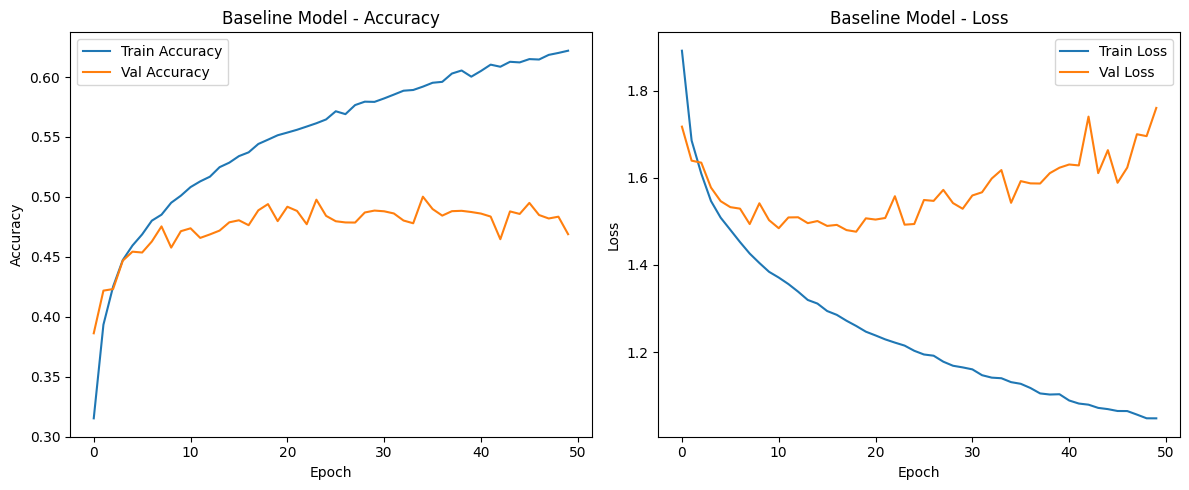

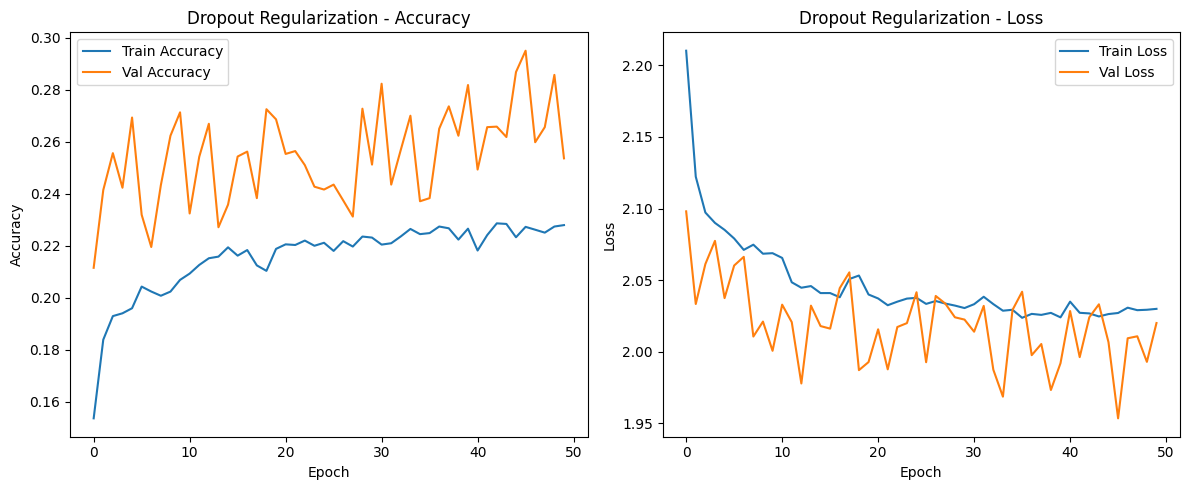

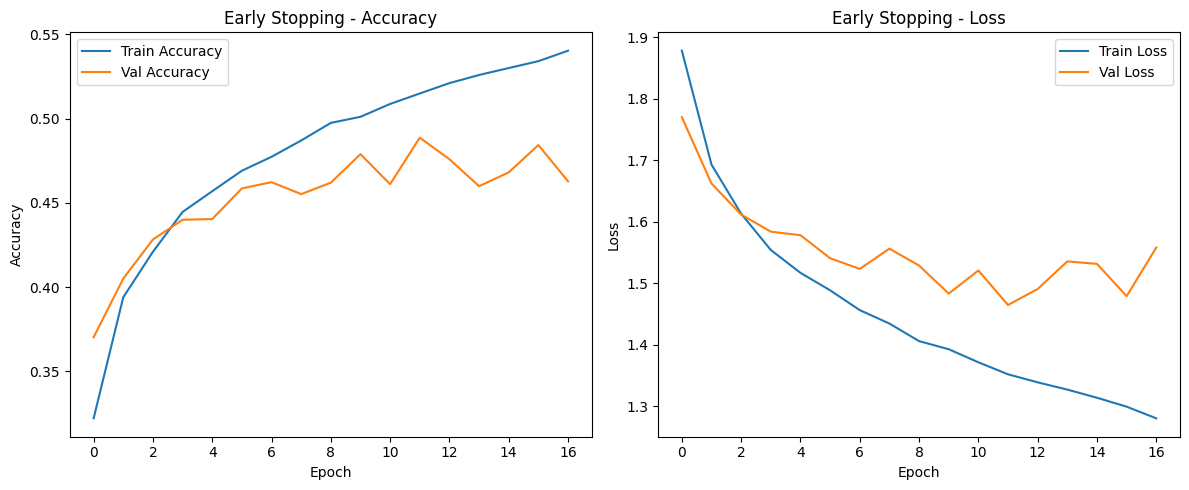

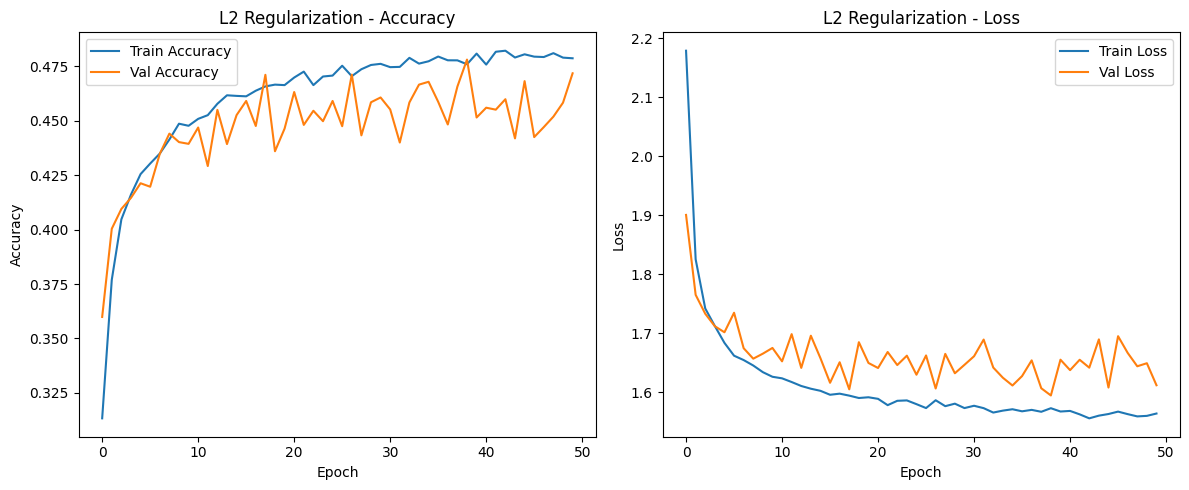

In [7]:
plot_history(history_baseline, "Baseline Model")
plot_history(history_dropout, "Dropout Regularization")
plot_history(history_early, "Early Stopping")
plot_history(history_l2, "L2 Regularization")

# CIFAR-10 Regularization Experiment: Feed-Forward Neural Network

##  Objective
Explore how regularization techniques—**Dropout**, **Early Stopping**, and **L2 Weight Decay**—impact overfitting and generalization on the CIFAR-10 dataset using a Dense Neural Network.

---

##  Baseline Model (No Regularization)

**Accuracy**
-  *Train Accuracy*: Steadily increases past 0.60.
-  *Validation Accuracy*: Plateaus around 0.50 and fluctuates.

**Loss**
-  *Train Loss*: Decreases consistently.
-  *Validation Loss*: Rises after early epochs, indicating overfitting.

> **Conclusion**: The model overfits—strong training performance but poor generalization.

---

##  Dropout Regularization

**Accuracy**
- *Train Accuracy*: Lower (~0.30) due to neuron dropout.
-  *Validation Accuracy*: Fluctuates but shows less overfitting.

**Loss**
-  *Train Loss*: Decreases steadily.
-  *Validation Loss*: Fluctuates but trends downward.

> **Conclusion**: Dropout slows learning but improves generalization by reducing overfitting.

---

##  Early Stopping

**Accuracy**
-  *Train Accuracy*: Increases until ~epoch 12.
-  *Validation Accuracy*: Peaks early, then fluctuates.

**Loss**
-  *Train Loss*: Drops consistently.
-  *Validation Loss*: Rises after early epochs, triggering early stopping at epoch 16.

> **Conclusion**: Early stopping prevents wasted training and halts before overfitting worsens.

---

##  L2 Regularization

**Accuracy**
-  *Train Accuracy*: Plateaus around 0.475.
-  *Validation Accuracy*: Trends upward, stabilizing near 0.45.

**Loss**
-  *Train Loss*: Decreases and stabilizes.
-  *Validation Loss*: Follows similar pattern with less fluctuation.

> **Conclusion**: L2 regularization penalizes large weights, encouraging simpler models that generalize better.

---

##  Summary Table

| Model Variant         | Regularization     | Best Epoch | Train Acc | Val Acc | Overfitting Reduced? |
|----------------------|--------------------|------------|-----------|---------|----------------------|
| Baseline             | None               | 50         | ~0.60     | ~0.50   | ❌                   |
| Dropout              | Dropout(0.5)       | 50         | ~0.30     | ~0.25   | ✅ (partial)          |
| Early Stopping       | Patience=5         | 16         | ~0.55     | ~0.50   | ✅                   |
| L2 Regularization    | L2(0.001)          | 50         | ~0.475    | ~0.45   | ✅                   |

---